#NAMA : FATHURRAHMAN NUR AZIZ
#NIM : 20.11.3694

#Week 12 - DBSCAN CLUSTERING

##1. Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

#2. load dataset

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

#3. EDA

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


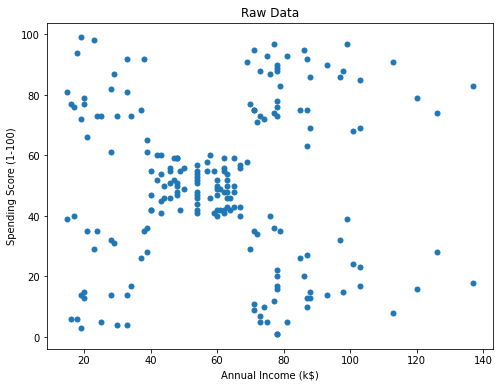

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], s = 25) #Point size is 25
plt.title('Raw Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
eps_values = np.arange(8,12.75,0.25)
min_samples = np.arange(3,10)

DBSCAN_params = list(product(eps_values,min_samples))

[(8.0, 3),
 (8.0, 4),
 (8.0, 5),
 (8.0, 6),
 (8.0, 7),
 (8.0, 8),
 (8.0, 9),
 (8.25, 3),
 (8.25, 4),
 (8.25, 5)]

In [ ]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

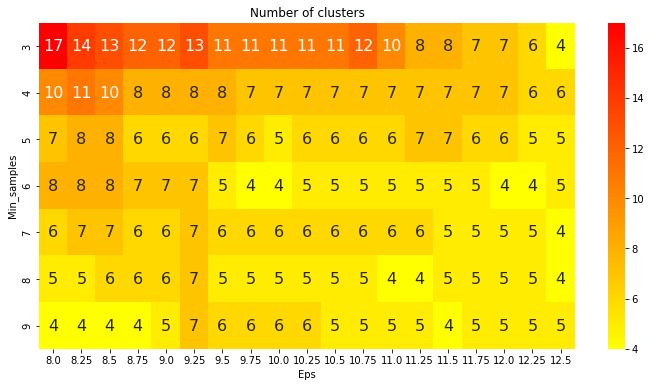

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="autumn_r", ax=ax)
ax.set_title('Number of clusters')
plt.show()

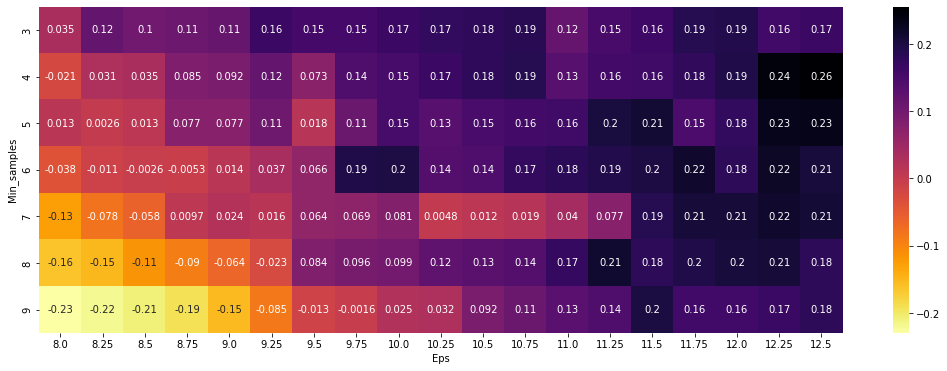

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="inferno_r", ax=ax)
plt.show()

In [ ]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)

DBSCAN_clustered = X.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

In [ ]:
DBSCAN_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


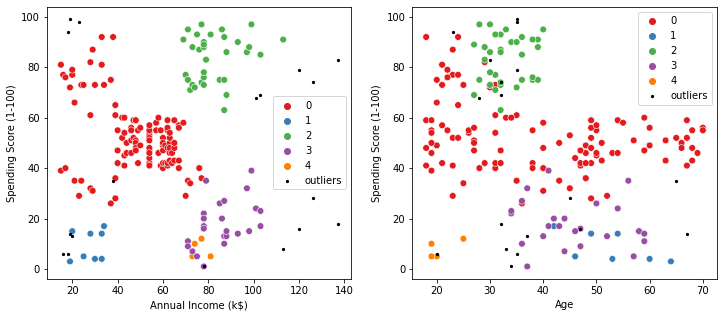

In [ ]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

In [ ]:
# Calculating v_measure
print('Annual Income (k$) v_measure =', v_measure_score(DBSCAN_clustered['Annual Income (k$)'], DBS_clustering.labels_))
print('Age v_measure =', v_measure_score(DBSCAN_clustered['Age'], DBS_clustering.labels_))

Annual Income (k$) v_measure = 0.3403718456844445
Age v_measure = 0.2711931017994847


#HYPERPARAMETER

Text(0, 0.5, 'Distance')

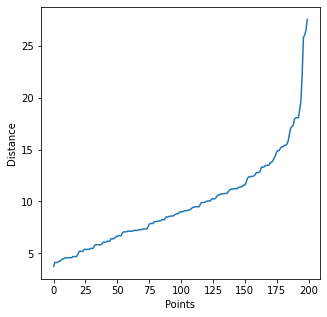

In [ ]:
from sklearn.neighbors import NearestNeighbors

N = 6
nearest_neighbors = NearestNeighbors(n_neighbors=N)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,3], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [ ]:
#!pip install -q kneed

14.177446878757825


<Figure size 360x360 with 0 Axes>

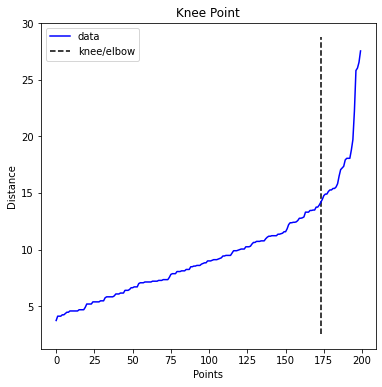

In [ ]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [ ]:
DBS_clustering = DBSCAN(eps=distances[knee.knee], min_samples=N).fit(X)

DBSCAN_clustered = X.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

In [ ]:
DBSCAN_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,-1
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,-1
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,21
0,112
1,8
2,35
3,24


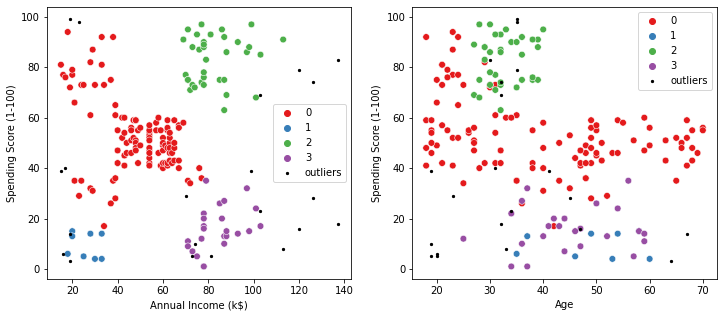

In [ ]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

In [ ]:
from sklearn.metrics import v_measure_score

In [ ]:
# Calculating v_measure
print('Annual Income (k$) v_measure =', v_measure_score(DBSCAN_clustered['Annual Income (k$)'], DBS_clustering.labels_))
print('Age v_measure =', v_measure_score(DBSCAN_clustered['Age'], DBS_clustering.labels_))

Annual Income (k$) v_measure = 0.331920043737698
Age v_measure = 0.247979742778344


In [ ]:
#ANALISA

#hasil terbaik untuk DBSCAN dataset mall_customers adalah

#N-neighbor = 7
#KNEE = 14.177446878757825

#terbentuk 5 cluster
#dengan outlier sejumlah 21

#dan v_measure 
#Annual Income (k$) v_measure = 0.331920043737698
#Age v_measure = 0.247979742778344
